#  Imports

In [15]:
import matplotlib.pyplot as plt
import cv2
import tensorflow
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Dense,Flatten, Conv2D, MaxPool2D, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [33]:
!pip install opencv-python==3.4.2.17

ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.2.17
ERROR: No matching distribution found for opencv-python==3.4.2.17


In [16]:
from tensorflow.keras.utils import to_categorical

# Read The DataSet

In [17]:
data = pd.read_csv('dataset.csv')

data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X= data.drop('0',axis=1)
y=data['0']

## split the dataset into training and testing datasets 

In [19]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2)

train_x = np.reshape(train_x.values,(train_x.shape[0],28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0],28,28))


train_x.shape
test_x.shape

(74490, 28, 28)

In [20]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

## plotting the number of alphabets in the dataset

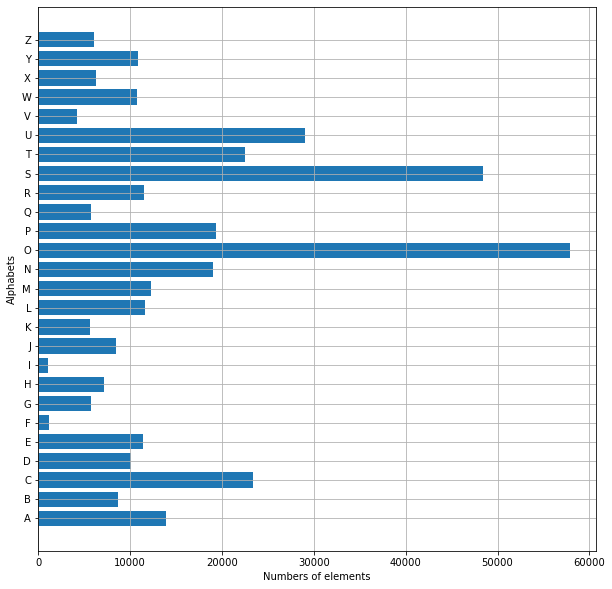

In [23]:
y_int=np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
    
alphabets=[]
for i in word_dict.values():
    alphabets.append(i)
    
fig, ax =plt.subplots(1,1,figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Numbers of elements")
plt.ylabel("Alphabets")
plt.grid()
plt.show()   

### shuffling the data

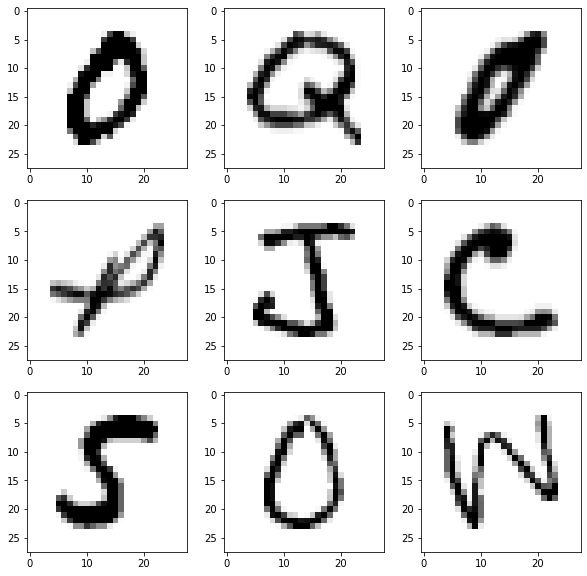

In [37]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    #shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

# reshaping the datasets to be used for model

In [41]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)


#Now we reshape the train & test image dataset so that they can be put in the model.

#New shape of train data:  (297960, 28, 28, 1)
#New shape of train data:  (74490, 28, 28, 1)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [42]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


# Model Creation
##  This model uses the CNN neural Network

In [43]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

# Training the model

In [44]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 255s 27ms/step - loss: 0.1721 - accuracy: 0.9540 - val_loss: 0.0931 - val_accuracy: 0.9739


In [45]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

## Printing Different Performance Measurements

In [46]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9739025235176086]
The training accuracy is : [0.9540005326271057]
The validation loss is : [0.0931391566991806]
The training loss is : [0.1720709353685379]


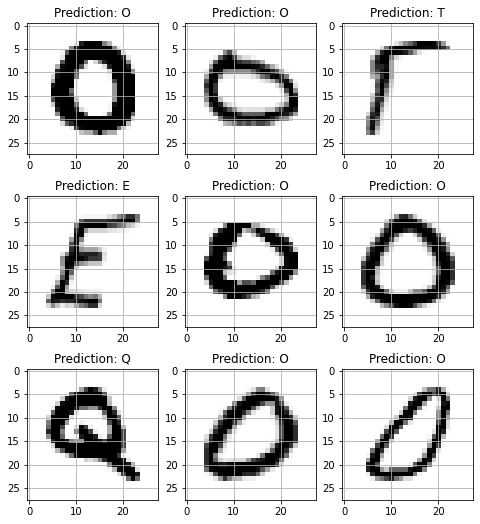

In [47]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()